## Amplitud modulada

Se define amplitud modulada como:


$f_{AM}(t) = A_c \cdot (1 + m \cdot f_m(t)) \cdot cos(w_c.t) $

si definimos  $f_m(t) = cos(w_m. t) $

$f_{AM}(t) = A_c \cdot (1 + m \cdot cos(w_m. t)) \cdot cos(w_c.t) $

donde $ |A_c| \leq 1 $ 

### Potencia
La amplitud máxima de cada banda lateral está dada por la expresión: $m = \frac{V_m}{V_p}$, siendo  $V_m$ la tensión de la señal moduladora y $V_p$ tensión de la portadora. Como la potencia es proporcional al cuadrado de la tensión, la potencia de la señal modulada resultará la suma de la potencia de la señal portadora más la potencia de ambas bandas laterales:<br />
$P \equiv V_p^2+\left(\frac{m V_p}{2}\right)^2+\left(\frac{m V_p}{2}\right)^2$<br /><br />
$P \equiv V_p^2 + \frac{m^2 V_p^2}{4}+ \frac{m^2 V_p^2}{4}$<br /><br />
Para que la igualdad sea posible debemos tener en cuenta las potencias en lugar de las tensiones:<br />
$P = P_p + \frac{m^2}{4}P_p+ \frac{m^2}{4}P_p$<br /><br />
$P = P_p + \frac{m^2}{2}P_p$<br /><br />
$P = \left(1 + \frac{m^2}{2}\right)P_p$<br /><br />

En el caso de que la modulación sea al cien por ciento, entonces $m = 1$ y por lo tanto la potencia de la señal modulada será:<br />
$P = \left(1+\frac{1}{2}\right) P_p$<br /><br />
$P = \frac{3}{2} P_p$<br /><br />
O lo que es lo mismo: <br />
$P_p = \frac{2}{3}P$<br /><br />
De lo último se desprende que la senal portadora consumirá dos tercios de la potencia total, dejando un tercio para ambas bandas laterales.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy                  # http://scipy.org/
from scipy.fftpack import fft, fftfreq
from time import time



%matplotlib inline

params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)


In [4]:
# Ejemplo AM en el tiempo
# modulante
fm   = 0.01 #Hz
Am   = 1   
# carrier
fc   = 1
m    = 0.5
Ac   = 1

# defino el sampleo
Fs = 10*fc #Sps 
dt = 1/Fs
# tiempo maximo del analisis 
T = 2/fm 
# vector de tiempo 
time  = np.arange(0, T, dt)


# modulante
Sm   = Am*(np.cos(2*np.pi*fm*time) + np.cos(2*np.pi*fm*3*time))/2
# modulada
Sam   = Ac*(1+m*Sm)*np.cos(2*np.pi*fc*time) 


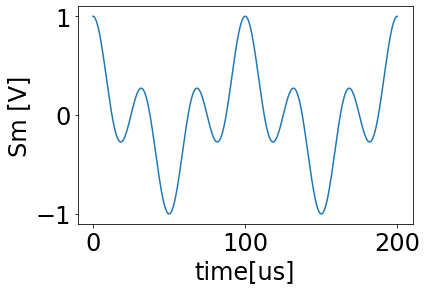

In [5]:
plt.plot(time, Sm)
plt.ylabel('Sm [V]')
plt.xlabel('time[us]')
plt.show()

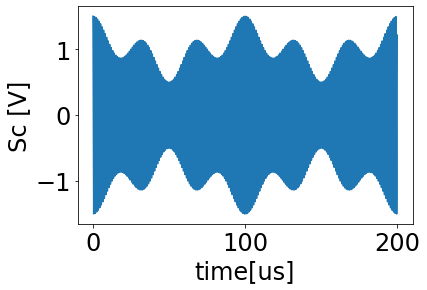

In [6]:
plt.plot(time, Sam)
plt.ylabel('Sc [V]')
plt.xlabel('time[us]')
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


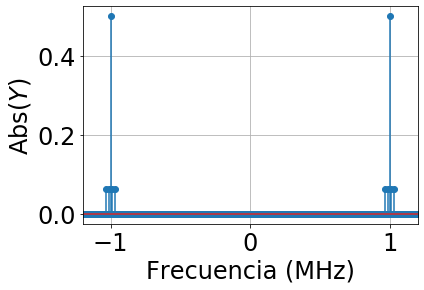

In [7]:
# FFT

Fam = fft(Sam) / len(Sam)  # Normalizada

frq = fftfreq(len(Sam), dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam) )  

plt.xlim(-1.20, 1.20)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()